In [1]:
from ldm import ldm

raw_data = ldm.get_experiment_measurements('exp2', label='Label1')
norm_data = ldm.normalize_values(raw_data)
norm_data_log = ldm.normalize_values(raw_data, log_value=True)

Processing plate BAF210901_9
Processing plate BAF210901_8
Processing plate BAF210901_7
Processing plate BAF210901_6
Processing plate BAF210901_5
Processing plate BAF210901_4
Processing plate BAF210901_3
Processing plate BAF210901_25
Processing plate BAF210901_24
Processing plate BAF210901_23
Processing plate BAF210901_22
Processing plate BAF210901_21
Processing plate BAF210901_20
Processing plate BAF210901_2
Processing plate BAF210901_19
Processing plate BAF210901_18
Processing plate BAF210901_17
Processing plate BAF210901_16
Processing plate BAF210901_15
Processing plate BAF210901_14
Processing plate BAF210901_13
Processing plate BAF210901_12
Processing plate BAF210901_11
Processing plate BAF210901_10
Processing plate BAF210901_1

Found 9600 measurements


In [2]:
z_prime = ldm.calculate_z_prime(raw_data)
z_prime_log = ldm.calculate_z_prime(raw_data, log_value=True)

In [3]:
%get raw_data
%get norm_data
%get norm_data_log
%get z_prime
%get z_prime_log

In [4]:
library(captioner)
library(RColorBrewer)
library(lawstat)
library(ggplot2)
library(dplyr)
library(bioassays)

library(car)
library(ggpubr)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




ERROR: Error in library(car): there is no package called ‘car’


In [6]:
type.pal = brewer.pal(9,"Set1")
type.pal = c(type.pal[2:1], "black", type.pal[3:9], brewer.pal(8,"Dark2"))

num_to_letter = function(number, base = 26, suffix = "") {
   number1 = number - 1
   last_digit = number1 %% base
   rest = number1 %/% base
   suffix = paste0(LETTERS[last_digit + 1], suffix)
   if (rest > 0) Recall(rest, base, suffix) else suffix
}


create_heatmap_plate = function(data, plate_barcode, size) {
    
    plate = data %>%  
    mutate(row = sapply(raw_data$plate_row, num_to_letter), col = raw_data$plate_column) %>% 
    filter(plate == plate_barcode) %>% 
    select(row, col, value)
    
    matrix = matrix96(plate, 'value', rm = 'TRUE')
    p = heatplate(matrix, plate_barcode, size=size)
    return(p)
    
}

create_histogram_plot <- function(data, x_var, fill_range, title, x_label="") {
      p = ggplot(data, aes(x = !!rlang::sym(x_var))) +
        geom_histogram(aes(fill = after_stat(count)), col = 'black', alpha = .4) +
        scale_fill_gradient("Count", low = fill_range[1], high = fill_range[2]) +
        ggtitle(title) +
        labs(x = x_label, y = "Count") +
        theme_bw() +
        theme(plot.title = element_text(hjust = 0.5)) 
        return(p)
}

create_controls_plot = function(data, x_var, y_var, group_var, color_var, title="", y_label="") {
    
    p = ggplot(data, aes(x = !!rlang::sym(x_var),
                         y = !!rlang::sym(y_var),
                         group = !!rlang::sym(group_var), 
                         color = !!rlang::sym(color_var))) +
                      geom_jitter(width=0.2) + 
                      ylab(y_label) + 
                      xlab("") +
                      scale_color_manual(name="", values = type.pal, drop=F) +
                      guides(color = guide_legend(ncol=1, byrow = T)) +
                      theme(strip.text = element_text(size=10),
                            axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size=rel(0.99)),
                            legend.position = "right", legend.title=element_text(size=rel(0.8)),
                            legend.text = element_text(size=rel(0.8)))
        
        
    return(p)
}



# Plate Heatmap

Plate heatmap of all raw luminescence values in a colour scale from green (low viability) to red (high viability) (figure 1).

In [ ]:
#p = heatplate(matrix, "Plate BAF210901_1", size=5)
heatmap = create_heatmap_plate(raw_data, 'BAF210901_1', size=5)
heatmap

# Data Distribution

Histograms of raw- and NPI-normalized data for each plate (figure 2).


In [ ]:
# make plots wider 
options(repr.plot.width=15, repr.plot.height=8)

In [ ]:

hist_raw = create_histogram_plot(data = norm_data, "value",  c("green", "red"),"Raw data", "log10(Measured value)")

hist_raw = hist_raw + facet_wrap(~plate, ncol=8, scales="free")
hist_raw

hist_norm = create_histogram_plot(data = norm_data,"norm", c("green", "red"), "Normalized data", "Normalized value")

hist_norm = hist_norm + facet_wrap(~plate, ncol=8, scales="free")
hist_norm


# Controls
Controlplot before- and after robust normalization (median and MAD) (figure 3).


In [ ]:
4 + 3

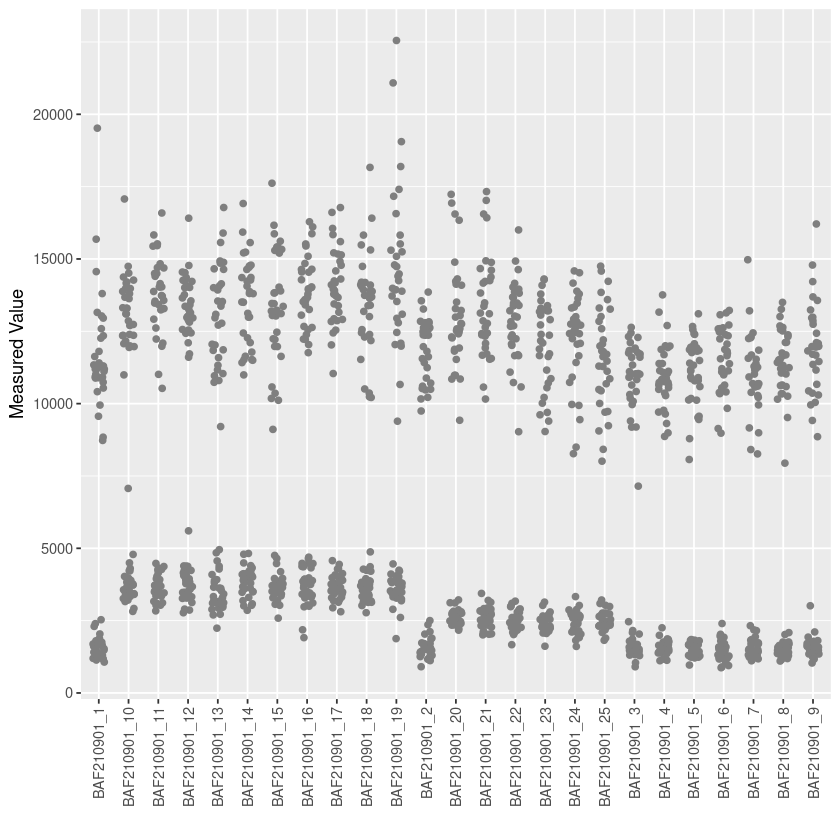

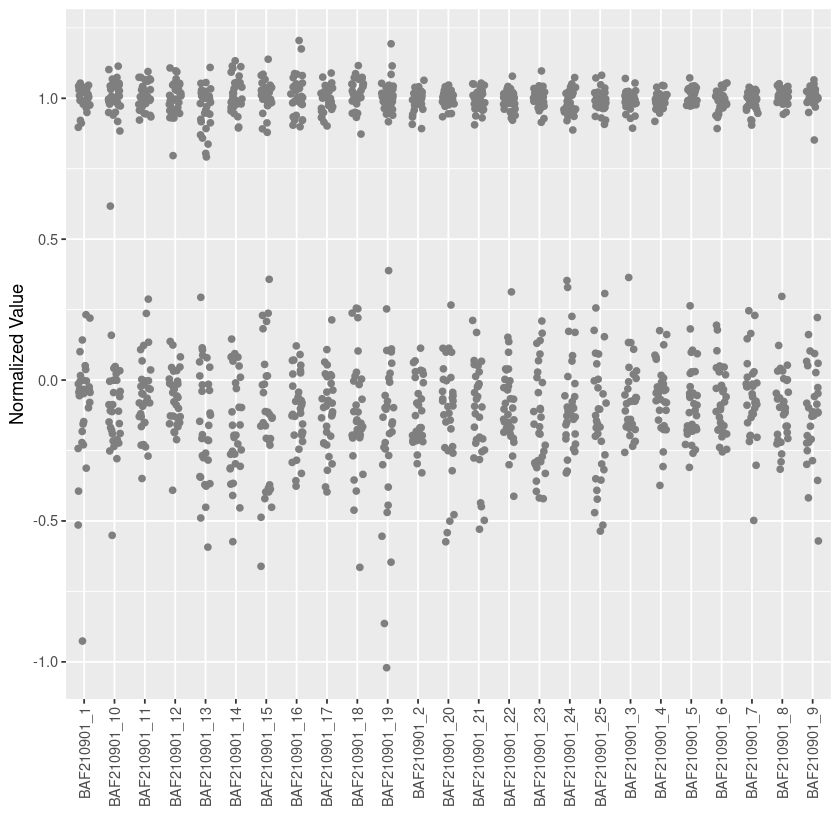

In [9]:
condat = droplevels(subset(norm_data, norm_data$control != 'C' & norm_data$control != 'empty'))

controls_raw = create_controls_plot(condat, 'plate', 'value', 'control', 'compound', "", "Measured Value")
controls_raw

controls_norm = create_controls_plot(condat, 'plate', 'norm', 'control', 'compound', "", "Normalized Value")
controls_norm

